In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import numpy as np
import pandas as pd
import scipy

import DarkNews as dn
from DarkNews import plot_tools as pt

from fastbnb import decayer, analysis
from fastbnb import fit_functions as ff

In [3]:
df = dn.GenLauncher(m4=0.01, mzprime=0.1, Umu4=1e-3, neval=1000, pandas = False, nu_flavors=["nu_mu"], loglevel='Error', experiment='miniboone_fhc_dirt').run()
df_temp = decayer.decay_selection(df, df.attrs['N4_ctau0'], "miniboone", weights="w_event_rate")

In [4]:
print(df_temp.w_event_rate.sum())
print(df.attrs['N4_ctau0'])

0.00965978362784714
5070831546.088944


In [535]:
df = dn.GenLauncher(m4=0.01, mzprime=0.1, neval=1000, pandas = False, nu_flavors=["nu_mu"], loglevel='Error', experiment='miniboone_fhc_dirt').run()
df_bar = dn.GenLauncher(m4=0.01, mzprime=0.1, neval=1000, pandas = False, nu_flavors=["nu_mu_bar"], loglevel='Error', experiment='miniboone_rhc_dirt').run()


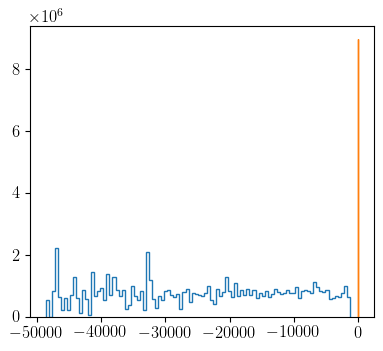

In [537]:
_ = plt.hist(df['pos_scatt','3'],weights=df['w_event_rate'], bins=100, histtype='step', density=False, label=r'$\bar{\nu}_\mu$')
_ = plt.hist(df_bar['pos_scatt','3'],weights=df_bar['w_event_rate'], bins=100, histtype='step', density=False, label=r'$\bar{\nu}_\mu$')

In [497]:
df_anal = analysis.reco_nueCCQElike_Enu(df, cut='circ1', clean_df=False)
df_decay = decayer.decay_selection(df_anal, df.attrs['N4_ctau0'], "miniboone", weights="reco_w")

In [498]:
# # ###################################################################################################
df_anal = analysis.reco_nueCCQElike_Enu(df, cut='circ1', clean_df=False)
test_umu4 = np.geomspace(1,20, 100)
chi2_test = np.array(
    [
        ff.chi2_MiniBooNE_2020_3p1(
            df_anal,
            cut='circ1',
            rate_rescale=(test) ** 2,
            decay_rescale=(test) ** 2,
            l_decay_proper_cm=df.attrs['N4_ctau0'],
        )
        for test in test_umu4
    ]
)
chi2_test[chi2_test < 0] = 1e10
theta_init_guess = -np.log10(test_umu4[np.argmin(chi2_test)])

chi2_func = lambda theta: ff.chi2_MiniBooNE_2020_3p1(
    df_anal,
    cut='circ1',
    rate_rescale=(10 ** (-theta))**2,
    decay_rescale=(10 ** (-theta))**2,
    l_decay_proper_cm=df.attrs['N4_ctau0'],
)

# 4. DO THE FITTING

x_minima = []
y_minima = []
for i in range(5):
    # Dual annealing is stochastic, so we run the algo a few times to be sure -- more costly
    # res = scipy.optimize.dual_annealing(chi2_func, bounds=[(-2, 10)], maxfun=1000, maxiter=100)

    # Gradient descent/greedy algo are deterministic, but with low stats, the minimum jumps around.
    res = scipy.optimize.minimize(
        chi2_func, theta_init_guess, method="Powell", bounds=[(-2, 10)]
    )
    print(res.success)
    x_minima.append(res.x[0])
    y_minima.append(res.fun)

# Get minimum of the multiple minimizations above
x_min = x_minima[np.argmin(y_minima)]
y_min = np.min(y_minima)

True
True
True
True
True


In [499]:
x_minima,y_minima = np.array(x_minima),np.array(y_minima)
x_minima,y_minima

(array([9.99996197, 9.99996197, 9.99996197, 9.99996197, 9.99996197]),
 array([31.80203112, 31.80203112, 31.80203112, 31.80203112, 31.80203112]))

In [486]:
# analyze the dataframe
df_temp = decayer.decay_selection(df, decay_l, "miniboone", weights="w_event_rate")
df_temp = analysis.reco_nueCCQElike_Enu(df_temp, cut='circ1')

df_temp_bar = decayer.decay_selection(df_bar, decay_l, "miniboone", weights="w_event_rate")
df_temp_bar = analysis.reco_nueCCQElike_Enu(df_temp_bar, cut='circ1')

# 1. Set general parameters for fitting

### Path and Grid

In [66]:

# general features
save = False
extension = 'pdf'
leg_loc = 'upper left'

# data names and titles
path = f'../results/3p1_general_0.0008/5m_18d_20h_51m_15s_'
# path = f'../results/3p2_general_delta_mz_1.25_eps_0.01/5m_18d_0h_54m_36s_'
path_data = path+'chi2.dat'
plot_path = path +f'plots/test.' + extension

f = open(path_data, 'r')
header = f.readline().replace('# ', '').split()
data = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)

plot_title = r'Best-fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$'
ylabel = r'$m_4 \ / $ GeV'
xlabel = r'$m_{Z^\prime} \ / $ GeV'
    

kwarg_data = path+'input_kwargs.npy'
kwargs = np.load(kwarg_data, allow_pickle=True).item()
kwargs

/tmp/ipykernel_16155/2944651946.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)


{'Umu4': 1e-06,
 'UD4': 0.7071067811865475,
 'gD': 2.0,
 'epsilon': 0.0008,
 'neval': 100000,
 'HNLtype': 'dirac',
 'noHF': True,
 'pandas': False,
 'parquet': False,
 'loglevel': 'ERROR',
 'sparse': 2}

/tmp/ipykernel_16155/64636379.py:15: UserWarning: linewidths is ignored by contourf
  cs = ax.tricontourf(X, Y, Z, levels=levels, cmap='Blues_r', linewidths=1)
/tmp/ipykernel_16155/64636379.py:17: UserWarning: linewidths is ignored by contourf
  cs = ax.tricontourf(X[allowed], Y[allowed], Z[allowed], levels=levels, cmap='Greens_r', linewidths=1)


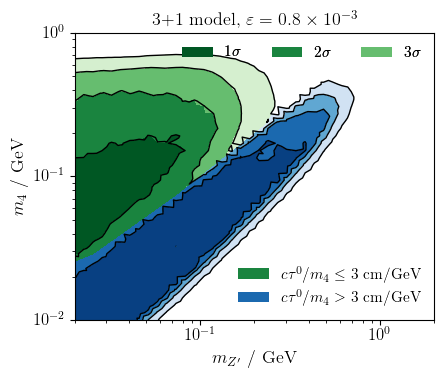

In [67]:
import matplotlib.colors as colors

# What to plot
X = data['mzprime'].values
Y = data['m4'].values
Z = data['chi2'].values - data['chi2'].min()

# Plot
fig, ax = pt.std_fig()

levels = [0,2.30,6.18,11.83,19.33]
allowed = data['decay_length']/data['m4'] <= 3
cs = ax.tricontourf(X, Y, Z, levels=levels, cmap='Blues_r', linewidths=1)
proxy_forbidden = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cs.collections]
cs = ax.tricontourf(X[allowed], Y[allowed], Z[allowed], levels=levels, cmap='Greens_r', linewidths=1)
proxy_allowed = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cs.collections]
_ = ax.tricontour(X, Y, Z, levels=levels, colors='black', linewidths=1)
    

leg1 = ax.legend([proxy_allowed[1],proxy_forbidden[1]], [r'$c\tau^0/m_4 \leq 3$~cm/GeV',r'$c\tau^0/m_4 > 3$~cm/GeV'], loc='lower right', fontsize=11, frameon=False)
leg2 = ax.legend(proxy_allowed, [r'$1\sigma$',r'$2\sigma$',r'$3\sigma$'], loc='upper right', fontsize=11, frameon=False, ncol=3)
fig.add_artist(leg1)
fig.add_artist(leg2)
ax.set_title(r'3+1 model, $\varepsilon = 0.8 \times 10^{-3}$',fontsize=13)
ax.set_xlabel(xlabel,fontsize=13)
ax.set_ylabel(ylabel,fontsize=13)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(X.min(),X.max())
ax.set_ylim(Y.min(),Y.max())

fig.savefig("plots/3p1_general_0.0008.pdf", bbox_inches='tight')

In [17]:
# data names and titles
path = f'../results/3p1_general_0.0008/5m_18d_20h_51m_15s_'
path_data = path+'chi2.dat'
plot_path = path +f'plots/test.' + extension

f = open(path_data, 'r')
header = f.readline().replace('# ', '').split()
data = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)

/tmp/ipykernel_17949/1384423360.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)


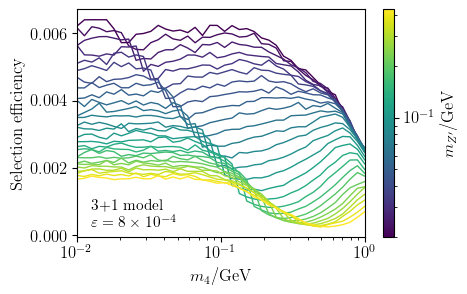

In [28]:
fig, ax = pt.std_fig(figsize=(4.44, 3))

mzs = data['mzprime'].unique()
mzs.sort()

cmap = cm.get_cmap('viridis')
myc = cmap(np.linspace(0,1,len(mzs)))
for i, c in enumerate(myc):
    mask = (data['mzprime'] == mzs[i])
    data_masked = data[mask].reset_index(drop=True).sort_values('m4')
    ax.plot(data_masked['m4'], data_masked['eff_total']/data_masked['eff_geometry'], color=c, label=f'{mzs[i]:.2f} GeV', lw=1)
    # ax.plot(data_masked['m4'], data_masked['eff_selection'], color=c, label=f'{mzs[i]:.2f} GeV', lw=1)

ax.set_xlim(0.01,1.0)
# ax.set_ylim(0,.05)
ax.set_xscale('log')
fig.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=mzs.min(), vmax=mzs.max()), cmap=cmap), ax=ax, label=r'$m_{Z^\prime}$/GeV')
ax.set_xlabel(r'$m_4$/GeV')
ax.set_ylabel(r'Selection efficiency')

ax.annotate(r'\noindent 3+1 model\\$\varepsilon = 8 \times 10^{-4}$', xy=(0.05, 0.05), xycoords='axes fraction', fontsize=11)

fig.savefig('plots/eff_selection_3p1.pdf', dpi=400, bbox_inches='tight')

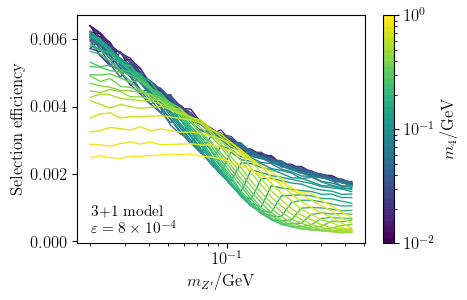

In [34]:
fig, ax = pt.std_fig(figsize=(4.44, 3))

Z = data['m4'].unique()
Z.sort()

cmap = cm.get_cmap('viridis', len(Z))
myc = cmap(np.linspace(0,1,len(Z)))
for i, c in enumerate(myc):
    mask = (data['m4'] == Z[i])
    data_masked = data[mask].reset_index(drop=True).sort_values('mzprime')
    # ax.plot(data_masked['mzprime'], data_masked['eff_selection'], color=c, label=f'{Z[i]:.2f} GeV', lw=1)
    ax.plot(data_masked['mzprime'], data_masked['eff_total']/data_masked['eff_geometry'], color=c, label=f'{Z[i]:.2f} GeV', lw=1)

# ax.set_xlim(0.02,2.0)
# ax.set_ylim(0,.05)
ax.set_xscale('log')
fig.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), cmap=cmap), ax=ax, label=r'$m_{4}$/GeV')
ax.set_xlabel(r'$m_{Z^\prime}$/GeV')
ax.set_ylabel(r'Selection efficiency')

ax.annotate(r'\noindent 3+1 model\\$\varepsilon = 8 \times 10^{-4}$', xy=(0.05, 0.05), xycoords='axes fraction', fontsize=11)

fig.savefig('plots/eff_selection_3p1_v2.pdf', dpi=400, bbox_inches='tight')

In [313]:
# data names and titles
path = f'../results/3p2_general_delta_mz_1.25_eps_0.0008/5m_18d_0h_54m_36s_'
path_data = path+'chi2.dat'
plot_path = path +f'plots/test.' + extension

f = open(path_data, 'r')
header = f.readline().replace('# ', '').split()
data = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)

/tmp/ipykernel_1072/1548151542.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)


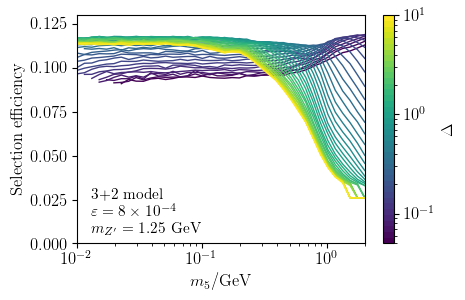

In [314]:
fig, ax = pt.std_fig(figsize=(4.44, 3))

Z = data['delta'].unique()
Z.sort()

cmap = cm.get_cmap('viridis', len(Z))
myc = cmap(np.linspace(0,1,len(Z)))
for i, c in enumerate(myc):
    mask = (data['delta'] == Z[i])
    data_masked = data[mask].reset_index(drop=True).sort_values('m5')
    ax.plot(data_masked['m5'], data_masked['eff_selection'], color=c, label=f'{Z[i]:.2f} GeV', lw=1)

ax.set_xlim(0.01,2.0)
ax.set_ylim(0,0.13)
ax.set_xscale('log')
fig.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), cmap=cmap), ax=ax, label=r'$\Delta$')
ax.set_xlabel(r'$m_{5}$/GeV')
ax.set_ylabel(r'Selection efficiency')

ax.annotate(r'\noindent 3+2 model\\$\varepsilon = 8 \times 10^{-4}$\\ $m_{Z^\prime} = 1.25$ GeV', xy=(0.05, 0.05), xycoords='axes fraction', fontsize=11)

fig.savefig('plots/eff_selection_3p2_delta_eps_0.0008.pdf', dpi=400, bbox_inches='tight')

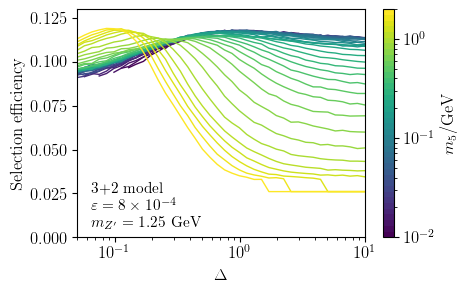

In [320]:
fig, ax = pt.std_fig(figsize=(4.44, 3))

Z = data['m5'].unique()
Z.sort()

cmap = cm.get_cmap('viridis', len(Z))
myc = cmap(np.linspace(0,1,len(Z)))
for i, c in enumerate(myc):
    mask = (data['m5'] == Z[i])
    data_masked = data[mask].reset_index(drop=True).sort_values('delta')
    ax.plot(data_masked['delta'], data_masked['eff_selection'], color=c, label=f'{Z[i]:.2f} GeV', lw=1)

ax.set_xlim(0.05,10.0)
ax.set_ylim(0,0.13)
ax.set_xscale('log')
fig.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), cmap=cmap), ax=ax, label=r'$m_5$/GeV')
ax.set_xlabel(r'$\Delta$')
ax.set_ylabel(r'Selection efficiency')

ax.annotate(r'\noindent 3+2 model\\$\varepsilon = 8\times 10^{-4}$\\ $m_{Z^\prime} = 1.25$ GeV', xy=(0.05, 0.05), xycoords='axes fraction', fontsize=11)

fig.savefig('plots/eff_selection_3p2_delta_eps_0.0008_v2.pdf', dpi=400, bbox_inches='tight')

In [321]:
# data names and titles
path = f'../results/3p2_general_mzprime_m4_0.15_eps_0.0008/5m_18d_0h_54m_36s_'
path_data = path+'chi2.dat'
plot_path = path +f'plots/test.' + extension

f = open(path_data, 'r')
header = f.readline().replace('# ', '').split()
data = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)

/tmp/ipykernel_1072/1621596707.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)


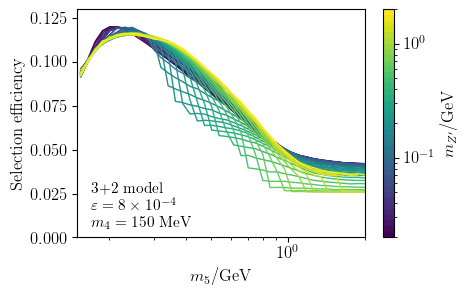

In [322]:
fig, ax = pt.std_fig(figsize=(4.44, 3))
FIXED_Z ='mzprime' 
INDEPENDENT = 'm5'
Z = data[FIXED_Z].unique()
Z.sort()

cmap = cm.get_cmap('viridis', len(Z))
myc = cmap(np.linspace(0,1,len(Z)))
for i, c in enumerate(myc):
    mask = (data[FIXED_Z] == Z[i])
    data_masked = data[mask].reset_index(drop=True).sort_values(INDEPENDENT)
    eff_geom = data_masked['eff_final']/data_masked['eff_selection']
    ax.plot(data_masked[INDEPENDENT], data_masked['eff_selection'], color=c, label=f'{Z[i]:.2f} GeV', lw=1)

ax.set_xlim(0.15,2.0)
ax.set_ylim(0,0.13)
ax.set_xscale('log')
# ax.set_yscale('log')
fig.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), cmap=cmap), ax=ax, label=r'$m_{Z^\prime}$/GeV')
ax.set_xlabel(r'$m_{5}$/GeV')
ax.set_ylabel(r'Selection efficiency')

ax.annotate(r'\noindent 3+2 model\\ $\varepsilon = 8 \times 10^{-4}$\\ $m_{4} = 150$ MeV', xy=(0.05, 0.05), xycoords='axes fraction', fontsize=11)

fig.savefig('plots/eff_selection_3p2_mzprime_m4_0.15_eps_0.01.pdf', dpi=400, bbox_inches='tight')

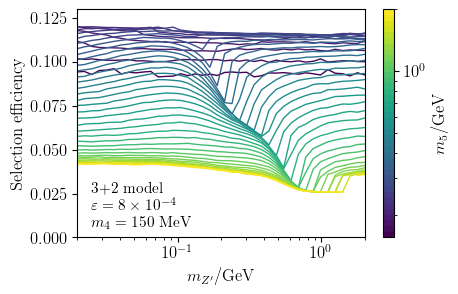

In [323]:
fig, ax = pt.std_fig(figsize=(4.44, 3))

FIXED_Z ='m5' 
INDEPENDENT = 'mzprime'
Z = data[FIXED_Z].unique()
Z.sort()

cmap = cm.get_cmap('viridis', len(Z))
myc = cmap(np.linspace(0,1,len(Z)))
for i, c in enumerate(myc):
    mask = (data[FIXED_Z] == Z[i])
    data_masked = data[mask].reset_index(drop=True).sort_values(INDEPENDENT)
    ax.plot(data_masked[INDEPENDENT], data_masked['eff_selection'], color=c, label=f'{Z[i]:.2f} GeV', lw=1)

ax.set_xlim(0.02,2.0)
ax.set_ylim(0,0.13)
ax.set_xscale('log')
fig.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), cmap=cmap), ax=ax, label=r'$m_{5}$/GeV')
ax.set_xlabel(r'$m_{Z^\prime}$/GeV')
ax.set_ylabel(r'Selection efficiency')

ax.annotate(r'\noindent 3+2 model\\$\varepsilon = 8 \times 10^{-4}$\\ $m_{4} = 150$ MeV', xy=(0.05, 0.05), xycoords='axes fraction', fontsize=11)

fig.savefig('plots/eff_selection_3p2_mzprime_m4_0.15_eps_0.01_v2.pdf', dpi=400, bbox_inches='tight')

In [156]:
# general features
save = True
extension = 'jpg'
leg_loc = 'upper left'

# data names and titles
path_data = path+'chi2_fit_3p2_muB.dat'
plot_path = path +f'plots/fit_3p2_general_mzprime_{mzprime}_muB.' + extension
data = pd.read_csv(path_data,sep='\t')

data = data[data.chi2 >= 0]

plot_title = r'Best-fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$'
xlabel = r'$m_5 \ / $ GeV'
ylabel = r'$\Delta$'
    
# load data for each parameter
X = data['m5'].values
Y = data['delta'].values

# line divisions for other possible channels
Y_1 = np.ones(len(Y))
Y_2 = 2 * Y_1
X_0 = np.linspace(X.min(),X.max(),500)
Y_1 = np.ones(len(X_0))
Y_2 = 2 * Y_1

# What to plot
Z = data['chi2'].values
Z -= Z.min()
dec = data['decay_length'].values / data['m5'].values

# Minimum
marker = '*'
mask = Z == Z.min()
xmin_enu, ymin_enu = X[mask][0],Y[mask][0]

# Number of events at MicroBooNE
W = data['n_muB'].values

# Colors
num_colors = 12
viridis = cm.get_cmap('viridis', num_colors)
bar_1 = mpatches.Patch(color=viridis(range(num_colors))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(num_colors))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(num_colors))[8], label=r'3 $\sigma$')
bar_4 = mpatches.Patch(color="gray", label=r'$c \tau_0 / m_5 = 1 \mathrm{cm / GeV}$')

# Plot
plt.rcParams["figure.figsize"] = (6,4)
levels = [0,2.3,6.18,11.83]
level_dif = [1.25]
plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)

levmuB = [1,10,100,1000]
dict_lev = {1: 1, 10: 10, 100: 100, 1000:1000}
positions = [(1.8,3),(1.05,6),(0.9,6),(0.4,6)]
nmuB = plt.tricontour(X,Y,W,levels=levmuB,colors='black',linewidths=1.5,linestyles='dotted')
plt.clabel(nmuB, nmuB.levels,inline=True, inline_spacing=10,manual=positions, use_clabeltext=True,fmt=dict_lev, fontsize=10)

# Plot ctau = 1 cm/GeV
cs = plt.tricontour(X,Y,dec,levels=[3.],colors='black',linewidths=1.5,linestyles='dashed')
a = cs.collections[0].get_paths()[0]
xline, yline = a.vertices.T
plt.fill_between(xline,0.8*yline,yline,color="black",alpha=0.5)

# Regime channels
plt.text(0.01,1.1,r'$N_5 \rightarrow N_4 N_4 \nu_i$',color='black',size=11)
plt.text(0.01,2.2,r'$N_5 \rightarrow N_4 N_4 N_4$',color='black',size=11)

# Plot minimum and regimes
plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker,markersize=12)
plt.plot(X_0,Y_1,color="gray",linewidth=1,linestyle="dotted")
plt.plot(X_0,Y_2,color="gray",linewidth=1,linestyle="dotted")
plt.fill_between(X_0,1,2,color="gray",alpha=0.2)
plt.fill_between(X_0,2,Y.max(),color="gray",alpha=0.4)
plt.text(0.011,0.06,r'$--c \tau_0 / m_5 = 3 \mathrm{cm / GeV}$',color='black',size=12)


plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc=leg_loc)
plt.title(plot_title,fontsize=15)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())
if save:
    plt.savefig(plot_path,dpi=400)
    plt.show()
else:
    plt.show()
plt.clf()

NameError: name 'mzprime' is not defined

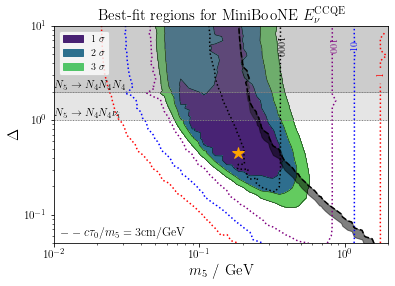

<Figure size 432x288 with 0 Axes>

In [11]:
# general features
save = True
extension = 'pdf'
leg_loc = 'upper left'

# data names and titles
path_data = path+'chi2_fit_3p2_muB.dat'
plot_path = path +f'plots/fit_3p2_general_mzprime_{mzprime}_muB_2.' + extension
data = pd.read_csv(path_data,sep='\t')

data = data[data.chi2 >= 0]

plot_title = r'Best-fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$'
xlabel = r'$m_5 \ / $ GeV'
ylabel = r'$\Delta$'
    
# load data for each parameter
X = data['m5'].values
Y = data['delta'].values

# line divisions for other possible channels
Y_1 = np.ones(len(Y))
Y_2 = 2 * Y_1
X_0 = np.linspace(X.min(),X.max(),500)
Y_1 = np.ones(len(X_0))
Y_2 = 2 * Y_1

# What to plot
Z = data['chi2'].values
Z -= Z.min()
dec = data['decay_length'].values / data['m5'].values

# Minimum
marker = '*'
mask = Z == Z.min()
xmin_enu, ymin_enu = X[mask][0],Y[mask][0]

# Number of events at MicroBooNE
W = data['n_muB'].values

# Colors
num_colors = 12
viridis = cm.get_cmap('viridis', num_colors)
bar_1 = mpatches.Patch(color=viridis(range(num_colors))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(num_colors))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(num_colors))[8], label=r'3 $\sigma$')
bar_4 = mpatches.Patch(color="gray", label=r'$c \tau_0 / m_5 = 1 \mathrm{cm / GeV}$')

# Plot
plt.rcParams["figure.figsize"] = (6,4)
levels = [0,2.3,6.18,11.83]
level_dif = [1.25]
plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)

levmuB = [1,10,100,1000]
dict_lev = {1: 1, 10: 10, 100: 100, 1000:1000}
positions = [(1.8,3),(1.05,6),(0.9,6),(0.4,6)]
nmuB = plt.tricontour(X,Y,W,levels=levmuB,linewidths=1.5,linestyles='dotted', colors=['red','blue','purple','black'])
plt.clabel(nmuB, nmuB.levels,inline=True, inline_spacing=10,manual=positions, use_clabeltext=True,fmt=dict_lev, fontsize=10, colors=['red','blue','purple','black'])

# Plot ctau = 1 cm/GeV
cs = plt.tricontour(X,Y,dec,levels=[3.],colors='black',linewidths=1.5,linestyles='dashed')
a = cs.collections[0].get_paths()[0]
xline, yline = a.vertices.T
plt.fill_between(xline,0.8*yline,yline,color="black",alpha=0.5)

# Regime channels
plt.text(0.01,1.1,r'$N_5 \rightarrow N_4 N_4 \nu_i$',color='black',size=11)
plt.text(0.01,2.2,r'$N_5 \rightarrow N_4 N_4 N_4$',color='black',size=11)

# Plot minimum and regimes
plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker,markersize=12)
plt.plot(X_0,Y_1,color="gray",linewidth=1,linestyle="dotted")
plt.plot(X_0,Y_2,color="gray",linewidth=1,linestyle="dotted")
plt.fill_between(X_0,1,2,color="gray",alpha=0.2)
plt.fill_between(X_0,2,Y.max(),color="gray",alpha=0.4)
plt.text(0.011,0.06,r'$--c \tau_0 / m_5 = 3 \mathrm{cm / GeV}$',color='black',size=12)


plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc=leg_loc)
plt.title(plot_title,fontsize=15)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())
if save:
    plt.savefig(plot_path,dpi=400)
    plt.show()
else:
    plt.show()
plt.clf()

## Minimum

In [11]:
data = pd.read_csv(path_data,sep='\t')

In [13]:
0.001599**2

2.5568009999999996e-06

In [12]:
data[data.chi2 == data.chi2.min()]

,mzprime,m5,m4,delta,sum_w_post_smearing,v_mu5,v_54,epsilon,u_mu5/u_mu4,chi2,decay_length,N_events
375,1.25,0.186009,0.128474,0.447837,0.000858,0.001599,1.0,0.01,0.0008,6.142354,25.024069,548.529103


In [11]:
print(xmin_enu,ymin_enu)

0.1860089283676563 0.4478373872279179


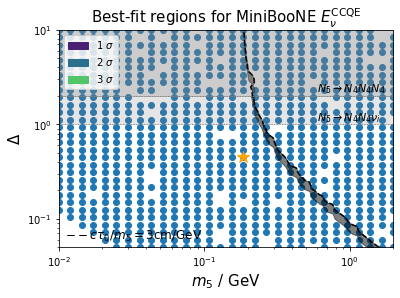

<Figure size 432x288 with 0 Axes>

In [12]:
# general features
save = False
extension = 'jpg'
leg_loc = 'upper left'

# data names and titles
path_data = path+'chi2_fit_3p2.dat'
plot_path = path +f'plots/fit_3p2_general_mzprime_{mzprime}_e_e-2.' + extension
data = pd.read_csv(path_data,sep='\t')

data = data[data.chi2 >= 0]

plot_title = r'Best-fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$'
xlabel = r'$m_5 \ / $ GeV'
ylabel = r'$\Delta$'
    
# load data for each parameter
X = data['m5'].values
Y = data['delta'].values

# line divisions for other possible channels
Y_1 = np.ones(len(Y))
Y_2 = 2 * Y_1
X_0 = np.linspace(X.min(),X.max(),500)
Y_1 = np.ones(len(X_0))
Y_2 = 2 * Y_1

# What to plot
Z = data['chi2'].values
Z -= Z.min()
dec = data['decay_length'].values / data['m5'].values

# Minimum
marker = '*'
mask = Z == Z.min()
xmin_enu, ymin_enu = X[mask][0],Y[mask][0]

# Colors
num_colors = 12
viridis = cm.get_cmap('viridis', num_colors)
bar_1 = mpatches.Patch(color=viridis(range(num_colors))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(num_colors))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(num_colors))[8], label=r'3 $\sigma$')
bar_4 = mpatches.Patch(color="gray", label=r'$c \tau_0 / m_5 = 1 \mathrm{cm / GeV}$')

# Plot
plt.rcParams["figure.figsize"] = (6,4)
levels = [0,2.3,6.18,11.83]
level_dif = [1.25]
#plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
#plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
plt.scatter(X,Y)

# Plot ctau = 1 cm/GeV
cs = plt.tricontour(X,Y,dec,levels=[3.],colors='black',linewidths=1.5,linestyles='dashed')
a = cs.collections[0].get_paths()[0]
xline, yline = a.vertices.T
plt.fill_between(xline,0.8*yline,yline,color="black",alpha=0.5)

# Regime channels
plt.text(0.6,1.1,r'$N_5 \rightarrow N_4 N_4 \nu_i$',color='black',size=11)
plt.text(0.6,2.2,r'$N_5 \rightarrow N_4 N_4 N_4$',color='black',size=11)

# Plot minimum and regimes
plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker,markersize=12)
plt.plot(X_0,Y_1,color="gray",linewidth=1,linestyle="dotted")
plt.plot(X_0,Y_2,color="gray",linewidth=1,linestyle="dotted")
plt.fill_between(X_0,1,2,color="gray",alpha=0.2)
plt.fill_between(X_0,2,Y.max(),color="gray",alpha=0.4)
plt.text(0.011,0.06,r'$--c \tau_0 / m_5 = 3 \mathrm{cm / GeV}$',color='black',size=12)


plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc=leg_loc)
plt.title(plot_title,fontsize=15)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())
if save:
    plt.savefig(plot_path,dpi=400)
    plt.show()
else:
    plt.show()
plt.clf()

In [23]:
m5

array([0.01   , 0.012  , 0.01441, 0.0173 , 0.02077, 0.02493, 0.02993,
       0.03593, 0.04313, 0.05177, 0.06215, 0.07461, 0.08957, 0.1075 ,
       0.1291 , 0.1549 , 0.186  , 0.2233 , 0.2681 , 0.3218 , 0.3863 ,
       0.4637 , 0.5567 , 0.6683 , 0.8022 , 0.963  , 1.156  , 1.388  ,
       1.666  , 2.     ])

In [31]:
np.sort(data['m5'].unique())

array([0.01      , 0.01200455, 0.0249304 , 0.02992783, 0.03592701,
       0.04312875, 0.10752172, 0.12907498, 0.1549487 , 0.18600893,
       0.22329534, 0.26805599, 0.32178914, 0.38629336, 0.46372777,
       0.55668429, 0.6682744 , 0.7       , 0.99328839, 1.40945975,
       2.        ])

In [28]:
len(np.sort(data['delta'].unique()))

30

In [29]:
len(data)

991